# SHAP Explainability for RUL Estimation
This notebook demonstrates the use of **SHAP (SHapley Additive exPlanations)** to interpret RUL predictions for turbofan engines. SHAP provides both local and global explanations, allowing us to understand the overall feature importance and individual predictions.


In [2]:
import shap
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Enable SHAP plots in the notebook
shap.initjs()


In [3]:
# Choose dataset
dataset = "FD001"  # Adjust to FD002, FD003, etc., as needed

# Load model
model = pickle.load(open(f"../models/random_forest_{dataset}.pkl", 'rb'))

# Load test data
test_data = pd.read_csv(f"../preprocessed_data/test_{dataset}_processed.csv")

# Prepare the feature columns
feature_columns = [col for col in test_data.columns if col not in ['unit_number', 'time_in_cycles', 'RUL', 'true_RUL']]
X_test = test_data[feature_columns].values
y_test = test_data['true_RUL'].values

# Display sample data
display(test_data.head())


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,true_RUL
0,1,31,0.465517,0.833333,0.0,0.0,0.412651,0.221932,0.281229,0.0,...,0.264706,0.155692,0.298192,0.0,0.416667,0.0,0.0,0.519380,0.636564,112
1,2,49,0.603448,0.416667,0.0,0.0,0.403614,0.339002,0.482444,0.0,...,0.308824,0.139127,0.483263,0.0,0.250000,0.0,0.0,0.519380,0.507595,98
2,3,126,0.408046,0.833333,0.0,0.0,0.503012,0.407892,0.618501,0.0,...,0.382353,0.162659,0.334744,0.0,0.583333,0.0,0.0,0.612403,0.524441,69
3,4,106,0.568966,0.833333,0.0,0.0,0.472892,0.512099,0.415766,0.0,...,0.338235,0.173909,0.532897,0.0,0.583333,0.0,0.0,0.341085,0.502486,82
4,5,98,0.425287,0.166667,0.0,0.0,0.319277,0.412034,0.626435,0.0,...,0.397059,0.133141,0.428242,0.0,0.500000,0.0,0.0,0.472868,0.714582,91


In [4]:
# Initialize SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)


In [5]:
# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)


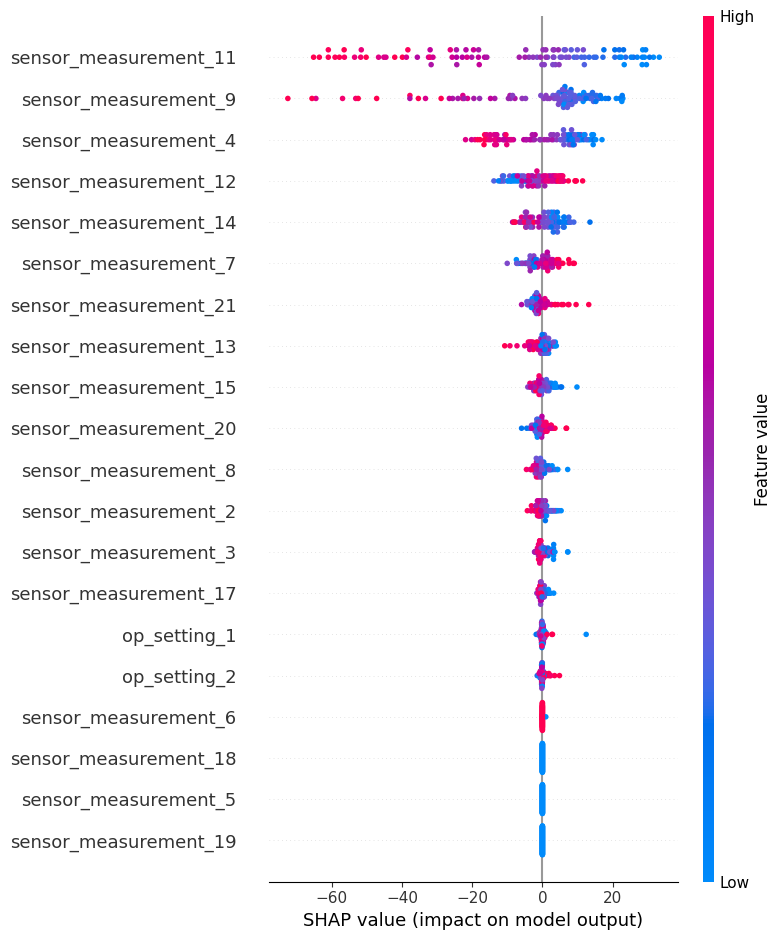

In [6]:
# Global explanation with SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_columns)


In [7]:
# Choose an instance to explain
instance_idx = np.random.randint(0, len(X_test))
instance = X_test[instance_idx]
true_rul = y_test[instance_idx]

# Display the SHAP force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[instance_idx], instance, feature_names=feature_columns)

# Print true RUL and predicted RUL
print(f"True RUL: {true_rul}")
print(f"Predicted RUL: {model.predict([instance])[0]}")


True RUL: 20
Predicted RUL: 22.13


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Interpretation of SHAP Outputs
- **Summary Plot**: Shows the overall impact of each feature across the dataset, indicating which features are most important for RUL predictions.
- **Force Plot**: For a specific prediction, it illustrates how each feature influenced the predicted RUL, showing the contribution as positive or negative.

The combination of these SHAP visualizations helps us understand both individual predictions and the overall feature behavior.


In [9]:
shap.save_html(f"../explanations/shap_force_plot_{dataset}_instance_{instance_idx}.html", 
               shap.force_plot(explainer.expected_value, shap_values[instance_idx], instance, feature_names=feature_columns))


### Summary of Findings
- **Key Features**: Identify features that consistently appear as important for RUL predictions.
- **Consistency with LIME**: Compare with LIME results to check if similar features are influential.
- **Reliability of SHAP Explanations**: Determine if SHAP explanations align with domain knowledge about turbofan degradation.

This notebook provides both local and global interpretability using SHAP, offering a deeper understanding of RUL predictions.
